# Emotion Classification with BLSTM

In this notebook, a dataset containing various phrases and sentences that show a particular emotion is used to train a model with a Bidirectional Long Short-Term Memory (BLSTM) neural network. The model will be able to correctly predict and classify the emotion displayed in the text.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Preprocessing Data](#2)
  - [ 2.1 Loading and Visualizing the Data](#2.1)
  - [ 2.2 Preparing Data](#2.2)
  - [ 2.2 Tokenize Text](#2.3)
- [ 3 - BLSTM Model](#3)
  - [ 3.1 Training](#3.1)
  - [ 3.2 Testing](#3.2)
- [ 4 - Results](#4)

<a name="1"></a>
## 1 - Packages 

Below are all the needed packages for this notebook.
- [numpy](https://www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](https://matplotlib.org) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [tensorflow](https://www.tensorflow.org/) is an end-to-end machine learning platform.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.activations import linear

<a name="2"></a>
## 2 - Preprocessing Data

The dataset contains rows consisting of a text and the emotion of the text.

The dataset can be found here: [Emotion Dataset for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?datasetId=605165&sortBy=voteCount&utm)
<br/><br/>
<a name="2.1"></a>
### 2.1 Loading and Visualizing the Data

In [2]:
#Load Data
data_train = pd.read_csv("./Data/train.txt", sep=";", header=None, names=['text', 'emotion'])
data_val = pd.read_csv("./Data/val.txt", sep=";", header=None, names=['text', 'emotion'])
data_test = pd.read_csv("./Data/test.txt", sep=";", header=None, names=['text', 'emotion'])

In [3]:
data_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
print("Train shape:", data_train.shape)
print("Validation shape: ", data_val.shape)
print("Test shape: ", data_test.shape)

Train shape: (16000, 2)
Validation shape:  (2000, 2)
Test shape:  (2000, 2)


In [5]:
#Get emotions
emotions = data_train['emotion'].unique().tolist()
print(f"List of emotions: {emotions}")

List of emotions: ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


<a name="2.2"></a>
### 2.2 Preparing Data

Let's encode our emotions into numerical categories.

In [6]:
#Create Dictionary of classes
classes = {}
for emotion in emotions:
    classes[emotion] = emotions.index(emotion)
    
print(classes)

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}


In [7]:
#Replace classes
data_train['emotion'] = data_train['emotion'].map(classes)
data_val['emotion'] = data_val['emotion'].map(classes)
data_test['emotion'] = data_test['emotion'].map(classes)

In [8]:
#data_train['original_text'] = data_train.loc[:, 'text']

In [9]:
data_train.head()

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


We'll need the number of unique words in the data for the model, and then let's create the arrays from the dataframes.

In [13]:
from collections import Counter

#Get word counts in data
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [14]:
counter = counter_word(data_train.text)
num_unique_words = len(counter)
print(f"Unique words: {num_unique_words}")

Unique words: 15212


In [15]:
print(f"Most common words: {counter.most_common(5)}")

Most common words: [('i', 25859), ('feel', 11183), ('and', 9589), ('to', 8972), ('the', 8370)]


In [16]:
#Create text and label arrays
train_x = data_train.text.to_numpy()
train_y = data_train.emotion.to_numpy()

val_x = data_val.text.to_numpy()
val_y = data_val.emotion.to_numpy()

test_x = data_test.text.to_numpy()
test_y = data_test.emotion.to_numpy()

<a name="2.3"></a>
### 2.3 Tokenize Text

Of course, we can't train our model with strings, so let's tokenize the text.

In [17]:
#Create tokenizer
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_x)

In [18]:
word_index = tokenizer.word_index
print(f"Tokenized words:")
word_index

Tokenized words:


{'i': 1,
 'feel': 2,
 'and': 3,
 'to': 4,
 'the': 5,
 'a': 6,
 'feeling': 7,
 'that': 8,
 'of': 9,
 'my': 10,
 'in': 11,
 'it': 12,
 'like': 13,
 'so': 14,
 'for': 15,
 'im': 16,
 'me': 17,
 'but': 18,
 'was': 19,
 'have': 20,
 'is': 21,
 'this': 22,
 'am': 23,
 'with': 24,
 'not': 25,
 'about': 26,
 'be': 27,
 'as': 28,
 'on': 29,
 'you': 30,
 'just': 31,
 'at': 32,
 'when': 33,
 'or': 34,
 'all': 35,
 'because': 36,
 'more': 37,
 'do': 38,
 'can': 39,
 'really': 40,
 'up': 41,
 't': 42,
 'are': 43,
 'by': 44,
 'very': 45,
 'know': 46,
 'been': 47,
 'if': 48,
 'out': 49,
 'myself': 50,
 'time': 51,
 'how': 52,
 'what': 53,
 'get': 54,
 'little': 55,
 'had': 56,
 'now': 57,
 'will': 58,
 'from': 59,
 'being': 60,
 'they': 61,
 'people': 62,
 'them': 63,
 'would': 64,
 'he': 65,
 'want': 66,
 'her': 67,
 'some': 68,
 'think': 69,
 'one': 70,
 'still': 71,
 'ive': 72,
 'him': 73,
 'even': 74,
 'who': 75,
 'an': 76,
 'life': 77,
 'its': 78,
 'make': 79,
 'there': 80,
 'we': 81,
 'bit': 82

In [19]:
#Create tokenized text sequences
train_sequences = tokenizer.texts_to_sequences(train_x)
val_sequences = tokenizer.texts_to_sequences(val_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

In [20]:
print(f"Original text: {train_x[0]}")
print(f"Tokenized text: {train_sequences[0]}")

Original text: i didnt feel humiliated
Tokenized text: [1, 138, 2, 678]


In [21]:
max_length = len(max(train_sequences, key=len))
print(f"Longest sequence: {max_length} tokens")

Longest sequence: 66 tokens


To train our model, we'll need the length of each training example to match, so now let's add padding to the short sequences.

In [22]:
#Create Padded sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating="post")

In [23]:
print(f"Padded sequences shape: {train_padded.shape}\n")
print(f"Padded sequence: {train_padded[0]}")

Padded sequences shape: (16000, 66)

Padded sequence: [  1 138   2 678   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


Now let's create a decoder for the sequences, in case we want to retrieve the original string.

In [24]:
#Get reversed tokenizer word index
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [25]:
print(f"Reversed word index:")
reverse_word_index

Reversed word index:


{1: 'i',
 2: 'feel',
 3: 'and',
 4: 'to',
 5: 'the',
 6: 'a',
 7: 'feeling',
 8: 'that',
 9: 'of',
 10: 'my',
 11: 'in',
 12: 'it',
 13: 'like',
 14: 'so',
 15: 'for',
 16: 'im',
 17: 'me',
 18: 'but',
 19: 'was',
 20: 'have',
 21: 'is',
 22: 'this',
 23: 'am',
 24: 'with',
 25: 'not',
 26: 'about',
 27: 'be',
 28: 'as',
 29: 'on',
 30: 'you',
 31: 'just',
 32: 'at',
 33: 'when',
 34: 'or',
 35: 'all',
 36: 'because',
 37: 'more',
 38: 'do',
 39: 'can',
 40: 'really',
 41: 'up',
 42: 't',
 43: 'are',
 44: 'by',
 45: 'very',
 46: 'know',
 47: 'been',
 48: 'if',
 49: 'out',
 50: 'myself',
 51: 'time',
 52: 'how',
 53: 'what',
 54: 'get',
 55: 'little',
 56: 'had',
 57: 'now',
 58: 'will',
 59: 'from',
 60: 'being',
 61: 'they',
 62: 'people',
 63: 'them',
 64: 'would',
 65: 'he',
 66: 'want',
 67: 'her',
 68: 'some',
 69: 'think',
 70: 'one',
 71: 'still',
 72: 'ive',
 73: 'him',
 74: 'even',
 75: 'who',
 76: 'an',
 77: 'life',
 78: 'its',
 79: 'make',
 80: 'there',
 81: 'we',
 82: 'bit'

In [26]:
#Create decoder
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [27]:
#Decode first sequence
decoded_text = decode(train_sequences[0])

print(f"Sequence: {train_sequences[0]}")
print(f"Decoded sequence: {decoded_text}")

Sequence: [1, 138, 2, 678]
Decoded sequence: i didnt feel humiliated


<a name="3"></a>
## 3 - BLSTM Model

To build the model, we'll use a sequential model. We'll start with an input embedding layer, and then have two BLSTM layers with 256 neurons, and an output Dense layer. The Dense layer uses a linear activation with a SparseCategoricalCrossEntropy loss function, as it is better computationally than the softmax activation.

In [28]:
model = Sequential(
    [   
        Embedding(num_unique_words, 64, input_length=max_length),               
        
        Bidirectional(LSTM(256, dropout=0.7, return_sequences=True)),
        Bidirectional(LSTM(256, dropout=0.7)),

        Dense(6, activation='linear')
        
    ], name = "my_model" 
)

In [29]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 64)            973568    
                                                                 
 bidirectional (Bidirectiona  (None, 66, 512)          657408    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 3,208,966
Trainable params: 3,208,966
Non-trainable params: 0
_________________________________________________________________


<a name="3.1"></a>
### 3.1 Training

In [30]:
#Compile and fit
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(
    train_padded, train_y,
    batch_size = 32,
    validation_data = (val_padded, val_y),
    epochs = 10
)

Epoch 1/10
500/500 [==============================] - 21s 35ms/step - loss: 1.2833 - accuracy: 0.5079 - val_loss: 0.7058 - val_accuracy: 0.7450
Epoch 2/10
500/500 [==============================] - 16s 32ms/step - loss: 0.5375 - accuracy: 0.8089 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 3/10
500/500 [==============================] - 16s 32ms/step - loss: 0.2838 - accuracy: 0.8992 - val_loss: 0.2130 - val_accuracy: 0.9170
Epoch 4/10
500/500 [==============================] - 16s 31ms/step - loss: 0.2019 - accuracy: 0.9281 - val_loss: 0.1971 - val_accuracy: 0.9225
Epoch 5/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1739 - accuracy: 0.9366 - val_loss: 0.1902 - val_accuracy: 0.9305
Epoch 6/10
500/500 [==============================] - 16s 31ms/step - loss: 0.1463 - accuracy: 0.9448 - val_loss: 0.1875 - val_accuracy: 0.9285
Epoch 7/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1302 - accuracy: 0.9502 - val_loss: 0.1643 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

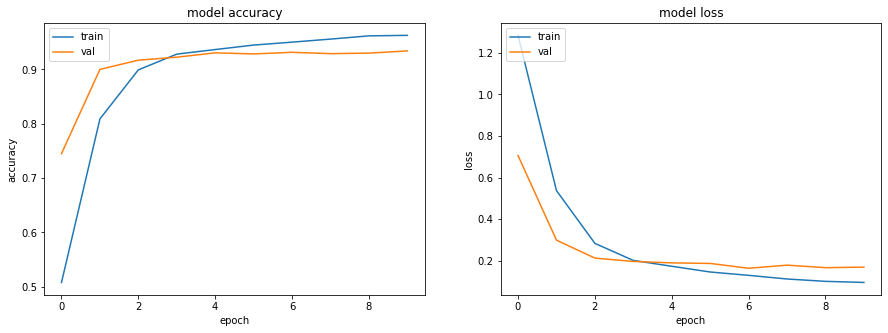

In [31]:
#PLot accuracy and loss function history
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show



<a name="3.2"></a>
### 3.2 Testing

Let's test our model with some examples from the testing set.

In [32]:
#Predict test sequences
prediction = model.predict(test_padded)

print(f"\n Emotions: {emotions}")

for i in range(5):
    decoded_text = decode(test_sequences[i])
    predicted_index = np.argmax(prediction[i])
    emotion = emotions[int(predicted_index)]
    
    print(f"\n Text: {decoded_text}")
    print(f" Prediction: {prediction[i]}")
    print(f" Largest Prediction index: {predicted_index}")
    print(f" Emotion: {emotion}")

63/63 [==============================] - 2s 13ms/step

 Emotions: ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

 Text: im feeling rather rotten so im not very ambitious right now
 Prediction: [ 9.377148  -1.1483724 -3.6395202 -2.5787718 -0.9802503 -2.3588364]
 Largest Prediction index: 0
 Emotion: sadness

 Text: im updating my blog because i feel shitty
 Prediction: [ 8.16976   -2.1097054 -2.7916653 -1.9888351 -1.4092461 -1.1254165]
 Largest Prediction index: 0
 Emotion: sadness

 Text: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
 Prediction: [ 7.8340316 -1.3864791 -2.7683792 -2.45416   -1.3841897 -1.2095743]
 Largest Prediction index: 0
 Emotion: sadness

 Text: i left with my of red and yellow under my arm feeling slightly more optimistic than when i arrived
 Prediction: [-2.169037  -1.6296289 -1.9921892 -2.4416597 -1.8605924  7.0699754]
 Largest Prediction index: 5
 Emotion: joy

 Text: i was feeling a little vain whe

<a name="4"></a>
## 4 -  Results

Below, we can observe that we have close loss functions and accuracies for the datasets. This means our model did not overfit the training data and can generalize well with new examples as seen with the validation and testing data. With low value loss functions and accuracies above 90%, we have a very good model.

In [33]:
#Get accuracy and loss values
print(f"train loss, train acc: {history.history['loss'][-1]}, {history.history['accuracy'][-1]}")
print(f"val loss, val acc: {history.history['val_loss'][-1]}, {history.history['val_accuracy'][-1]}\n")

results = model.evaluate(test_padded, test_y, batch_size=32)
print("test loss, test acc:", results)

train loss, train acc: 0.09613322466611862, 0.9626874923706055
val loss, val acc: 0.16964811086654663, 0.9340000152587891

63/63 [==============================] - 1s 13ms/step - loss: 0.1704 - accuracy: 0.9345
test loss, test acc: [0.17035764455795288, 0.934499979019165]
